In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix

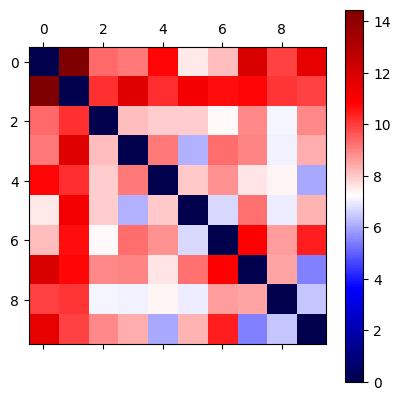

In [9]:
# Loading data
train_in = pd.read_csv('train_in.csv', header=None)
train_out = pd.read_csv('train_out.csv', header=None)
test_in = pd.read_csv('test_in.csv', header=None)
test_out = pd.read_csv('test_out.csv', header=None)

total_digits = 10

cloud_centers = np.zeros((total_digits, train_in.shape[1]))


for each_num in range(total_digits):
    number_train_data = train_in[train_out[0] == each_num]
    cloud_centers[each_num] = np.mean(number_train_data, axis=0)

center_distances = distance_matrix(cloud_centers, cloud_centers)

# Display the cloud center distances
plt.matshow(center_distances, cmap="seismic")
plt.colorbar()
plt.show()


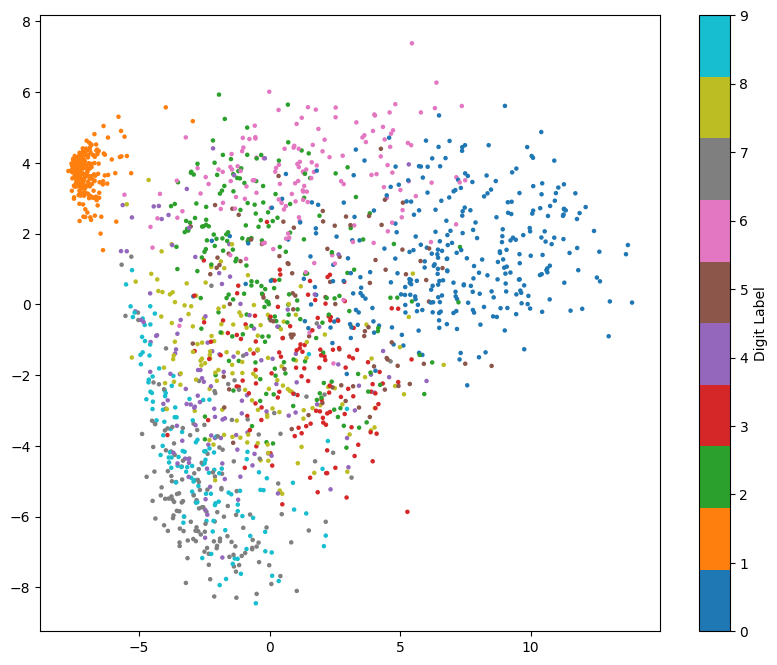

In [10]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
train_in_pca = pca.fit_transform(train_in)

# Plot the results, coloring by digit label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_in_pca[:, 0], train_in_pca[:, 1], c=train_out, cmap='tab10', s=5)
plt.colorbar(scatter, label='Digit Label')
plt.show()


/Users/kichu/Documents/workspace/idp/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


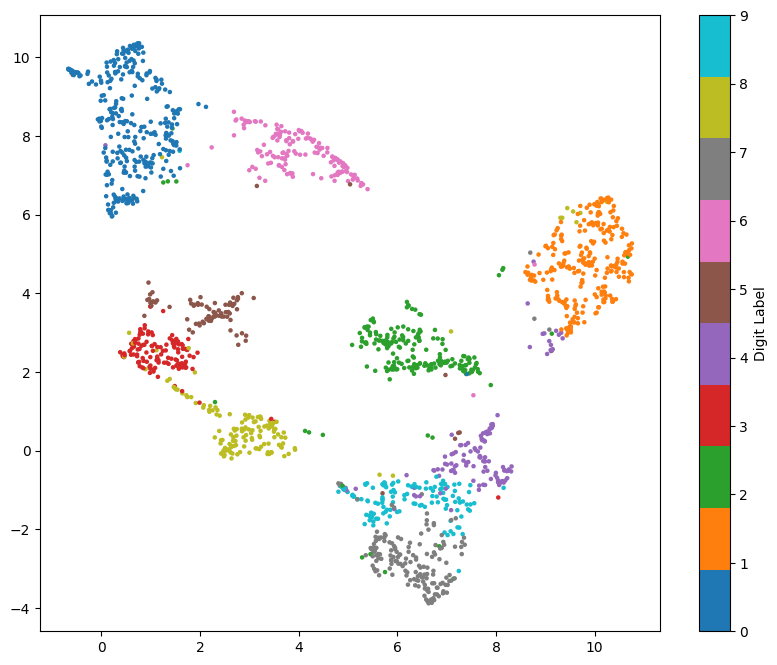

In [11]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
train_in_umap = umap_reducer.fit_transform(train_in)

# Plot the U-MAP results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_in_umap[:, 0], train_in_umap[:, 1], c=train_out, cmap='tab10', s=5)
plt.colorbar(scatter, label='Digit Label')
plt.show()


/Users/kichu/Documents/workspace/idp/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


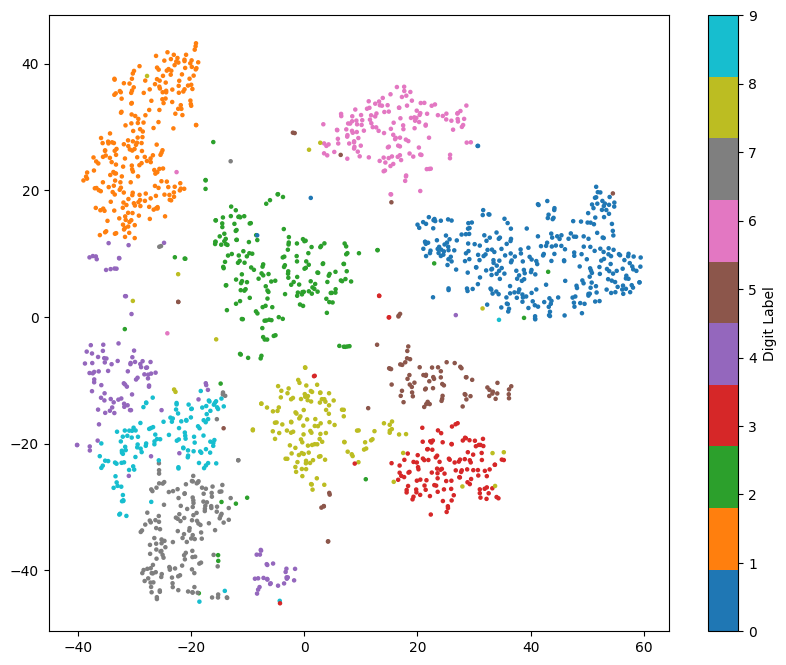

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
train_in_tsne = tsne.fit_transform(train_in)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_in_tsne[:, 0], train_in_tsne[:, 1], c=train_out, cmap='tab10', s=5)
plt.colorbar(scatter, label='Digit Label')
plt.show()


In [13]:
from sklearn.metrics import accuracy_score

# Load the data
train_in = pd.read_csv('train_in.csv', header=None).values
train_out = pd.read_csv('train_out.csv', header=None).values.ravel()
test_in = pd.read_csv('test_in.csv', header=None).values
test_out = pd.read_csv('test_out.csv', header=None).values.ravel()

# Calculate the mean vectors for each digit class (0-9)
mean_vectors = np.zeros((10, train_in.shape[1]))

for digit in range(10):
    digit_data = train_in[train_out == digit]
    mean_vectors[digit] = np.mean(digit_data, axis=0)
    

# Predicting using the nearest mean classifier
def nearest_mean_classifier(X, mean_vectors):
    # Calculate the Euclidean distance between each point and each mean vector
    distances = np.linalg.norm(X[:, np.newaxis] - mean_vectors, axis=2)
    # Predict the label of the closest mean
    predictions = np.argmin(distances, axis=1)
    return predictions

# Applying the classifier on the training and test sets
train_predictions = nearest_mean_classifier(train_in, mean_vectors)
test_predictions = nearest_mean_classifier(test_in, mean_vectors)

# Calculating the accuracy
train_accuracy = accuracy_score(train_out, train_predictions)
test_accuracy = accuracy_score(test_out, test_predictions)

print(f"Nearest Mean Classifier Accuracy on Training Set: {train_accuracy * 100:.2f}%")
print(f"Nearest Mean Classifier Accuracy on Test Set: {test_accuracy * 100:.2f}%")


Nearest Mean Classifier Accuracy on Training Set: 86.35%
Nearest Mean Classifier Accuracy on Test Set: 80.40%


Nearest Mean Classifier Accuracy on Training Set: 86.35%
Nearest Mean Classifier Accuracy on Test Set: 80.40%
For k = 1:
KNN Accuracy on Training Set: 100.00%
KNN Accuracy on Test Set: 91.50%
For k = 2:
KNN Accuracy on Training Set: 98.07%
KNN Accuracy on Test Set: 89.80%
For k = 3:
KNN Accuracy on Training Set: 97.89%
KNN Accuracy on Test Set: 91.40%


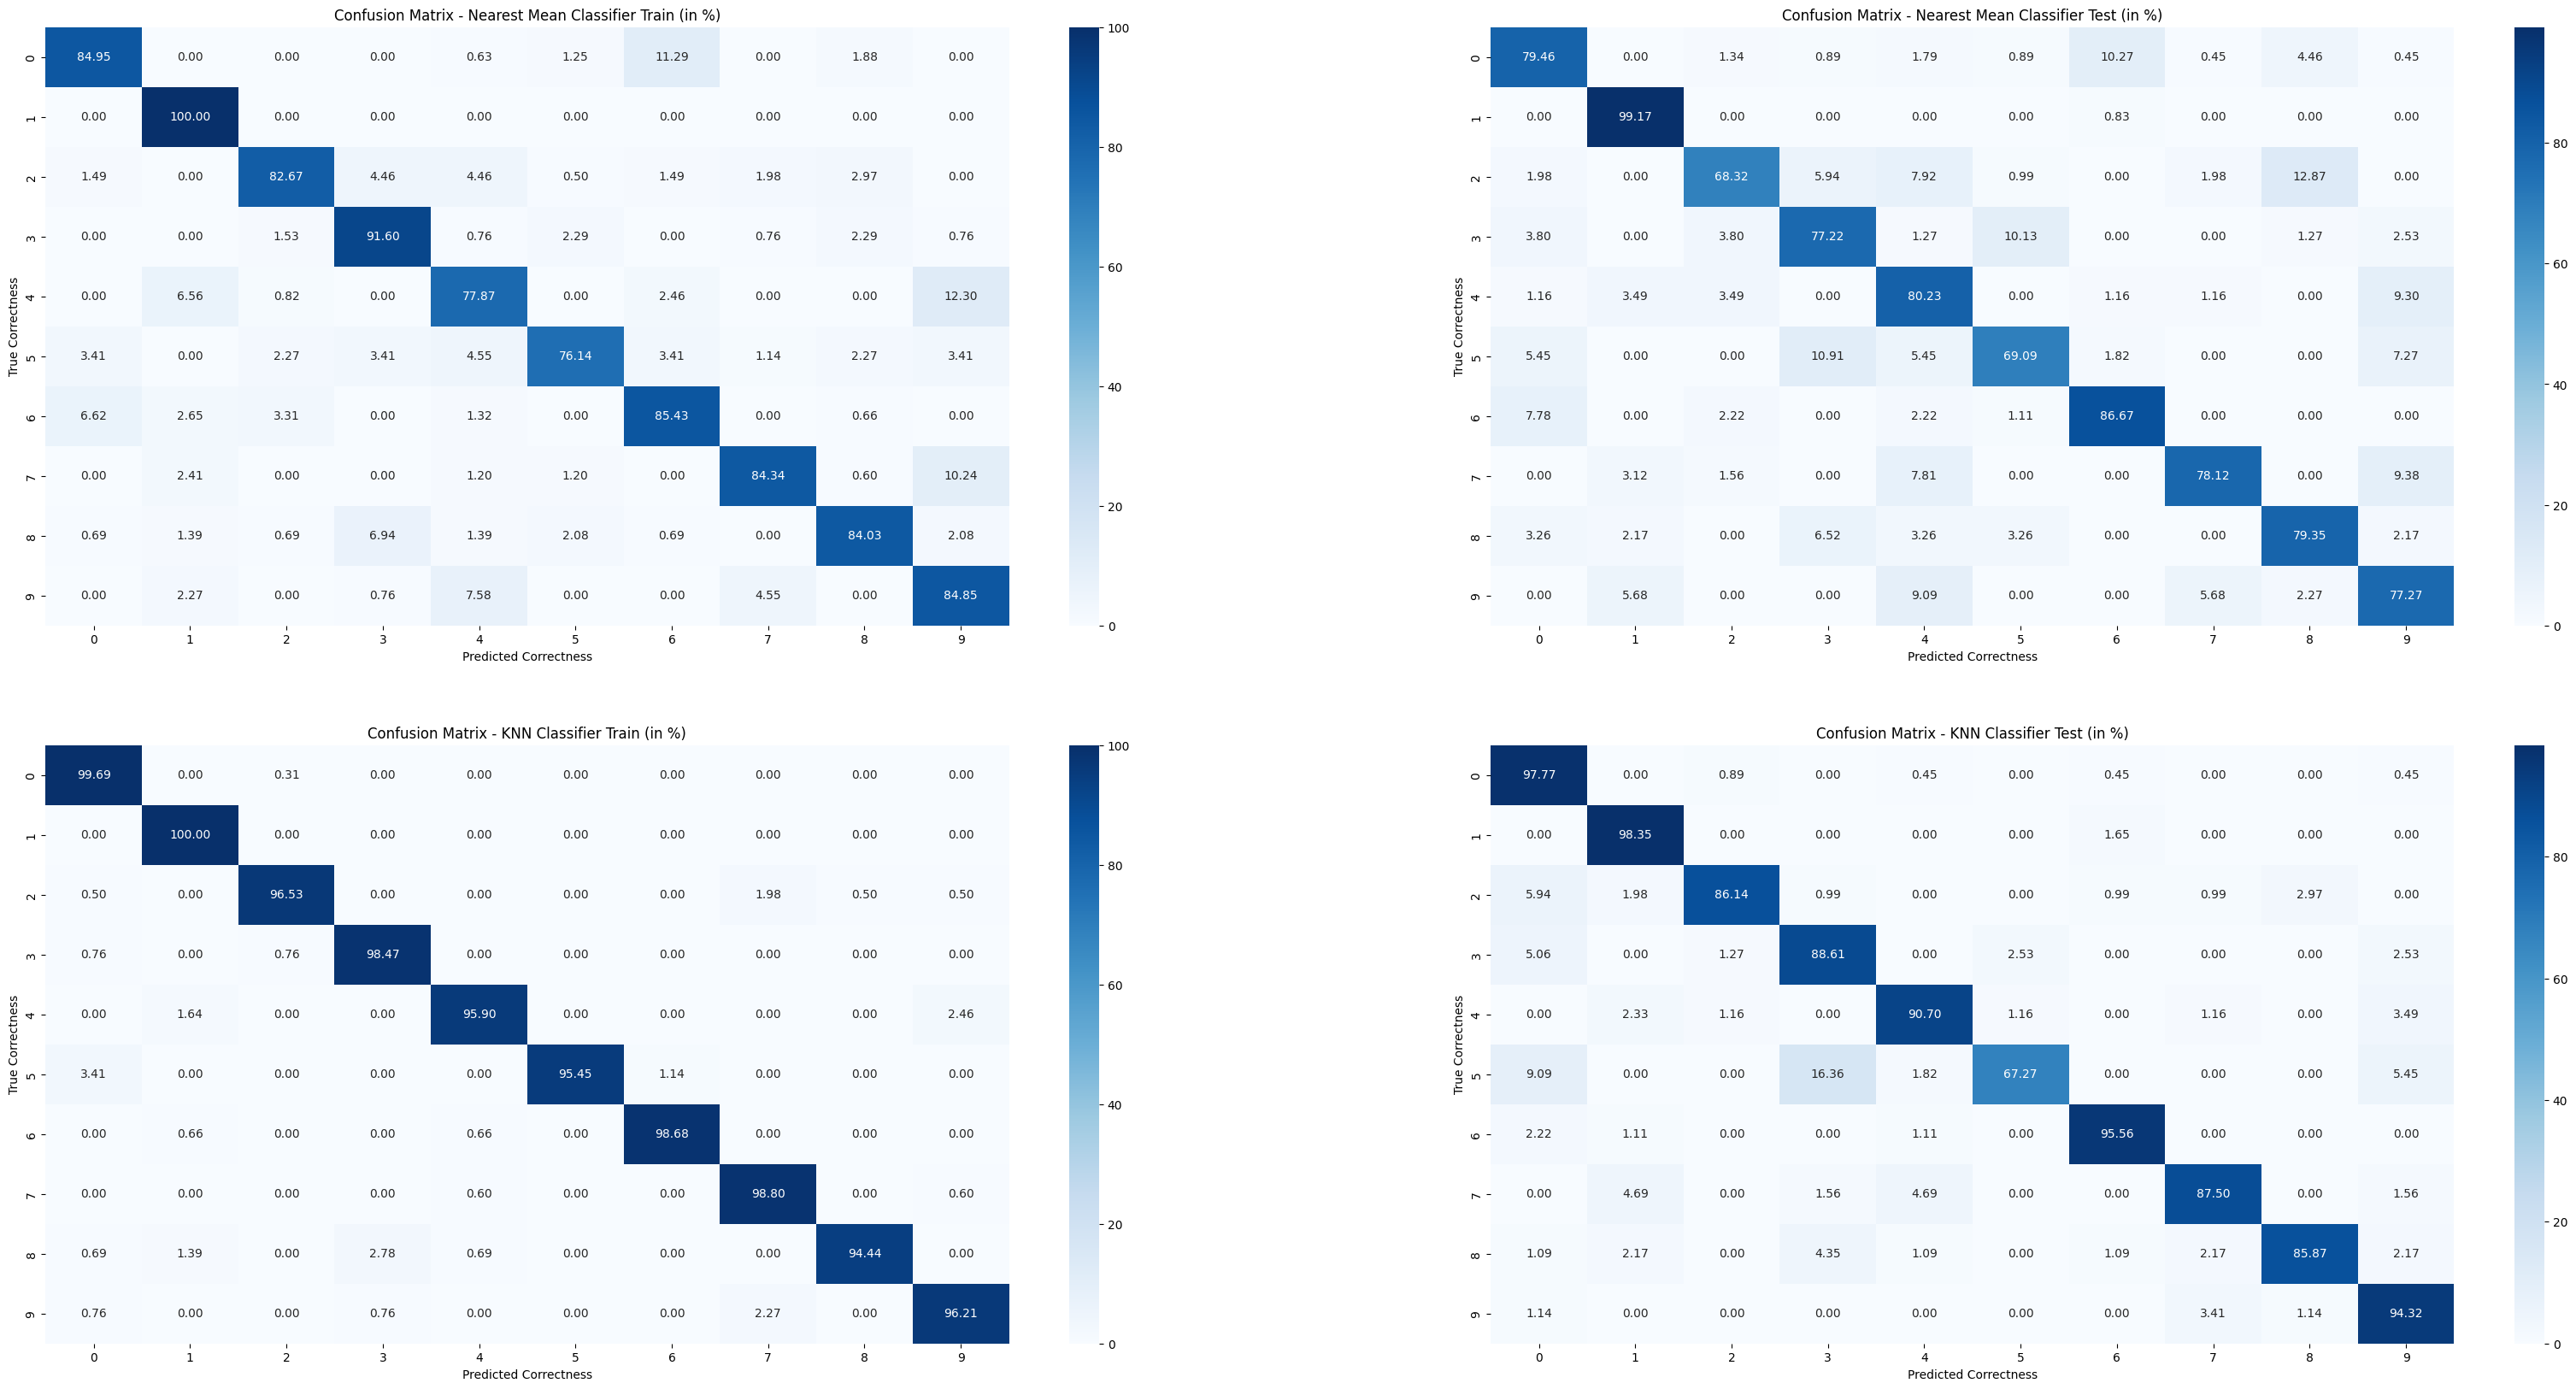

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 2: Implement KNN using scikit-learn

print(f"Nearest Mean Classifier Accuracy on Training Set: {train_accuracy * 100:.2f}%")
print(f"Nearest Mean Classifier Accuracy on Test Set: {test_accuracy * 100:.2f}%")
for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=i)  # You can change the value of k
    knn.fit(train_in, train_out)

    # Apply KNN to the training and test sets
    train_predictions_knn = knn.predict(train_in)
    test_predictions_knn = knn.predict(test_in)

    # Calculate accuracies for both classifiers

    train_accuracy_knn = accuracy_score(train_out, train_predictions_knn)
    test_accuracy_knn = accuracy_score(test_out, test_predictions_knn)
    
    print(f"For k = {i}:")

    print(f"KNN Accuracy on Training Set: {train_accuracy_knn * 100:.2f}%")
    print(f"KNN Accuracy on Test Set: {test_accuracy_knn * 100:.2f}%")

# Generate confusion matrices
confusion_matrix_nm_train = confusion_matrix(train_out, train_predictions)
confusion_matrix_nm_test = confusion_matrix(test_out, test_predictions)
confusion_matrix_knn_train = confusion_matrix(train_out, train_predictions_knn)
confusion_matrix_knn_test = confusion_matrix(test_out, test_predictions_knn)


confusion_matrix_nm_train_percentage = confusion_matrix_nm_train.astype('float') / confusion_matrix_nm_train.sum(axis=1)[:, np.newaxis] * 100
confusion_matrix_nm_test_percentage = confusion_matrix_nm_test.astype('float') / confusion_matrix_nm_test.sum(axis=1)[:, np.newaxis] * 100
confusion_matrix_knn_train_percentage = confusion_matrix_knn_train.astype('float') / confusion_matrix_knn_train.sum(axis=1)[:, np.newaxis] * 100
confusion_matrix_knn_test_percentage = confusion_matrix_knn_test.astype('float') / confusion_matrix_knn_test.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrices
fig, ax = plt.subplots(2, 2, figsize=(40, 20))

sns.heatmap(confusion_matrix_nm_train_percentage, annot=True, fmt=".2f", cmap='Blues', ax=ax[0][0])
ax[0][0].set_title('Confusion Matrix - Nearest Mean Classifier Train (in %)')
ax[0][0].set_xlabel('Predicted Correctness')
ax[0][0].set_ylabel('True Correctness')

sns.heatmap(confusion_matrix_nm_test_percentage, annot=True, fmt=".2f", cmap='Blues', ax=ax[0][1])
ax[0][1].set_title('Confusion Matrix - Nearest Mean Classifier Test (in %)')
ax[0][1].set_xlabel('Predicted Correctness')
ax[0][1].set_ylabel('True Correctness')

sns.heatmap(confusion_matrix_knn_train_percentage, annot=True, fmt=".2f", cmap='Blues', ax=ax[1][0])
ax[1][0].set_title('Confusion Matrix - KNN Classifier Train (in %)')
ax[1][0].set_xlabel('Predicted Correctness')
ax[1][0].set_ylabel('True Correctness')

sns.heatmap(confusion_matrix_knn_test_percentage, annot=True, fmt=".2f", cmap='Blues', ax=ax[1][1])
ax[1][1].set_title('Confusion Matrix - KNN Classifier Test (in %)')
ax[1][1].set_xlabel('Predicted Correctness')
ax[1][1].set_ylabel('True Correctness')

plt.show()

In [15]:
unique_values, counts = np.unique(test_out, return_counts=True)

# Print the results
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1 2 3 4 5 6 7 8 9]
Counts: [224 121 101  79  86  55  90  64  92  88]
